In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from scipy.signal import sawtooth

import packages

In [2]:
a = 2 * np.random.random(10).reshape((5,2))
b = packages.animation.Universe.box_confine(a)
a, b

(array([[0.87642333, 0.22587801],
        [1.98227661, 1.81344558],
        [0.13870899, 1.22685179],
        [1.88471209, 1.8305019 ],
        [1.06417294, 1.06904118]]),
 array([[0.87642333, 0.22587801],
        [0.01772339, 0.18655442],
        [0.13870899, 0.77314821],
        [0.11528791, 0.1694981 ],
        [0.93582706, 0.93095882]]))

In [43]:
def func(b):
    b -= 1

a = np.arange(10)
print(a)
func(a)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[-1  0  1  2  3  4  5  6  7  8]


In [37]:
a = np.arange(10)
for b in a:
    if b == 2:
        b=3

a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

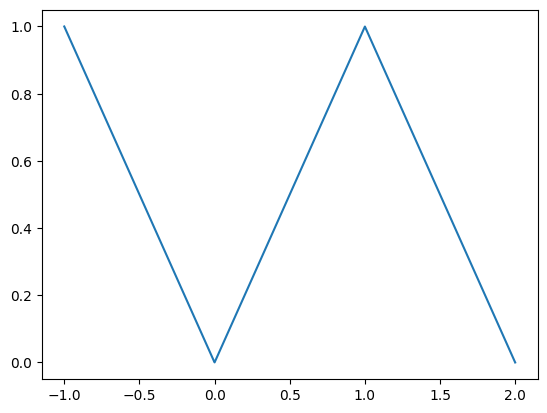

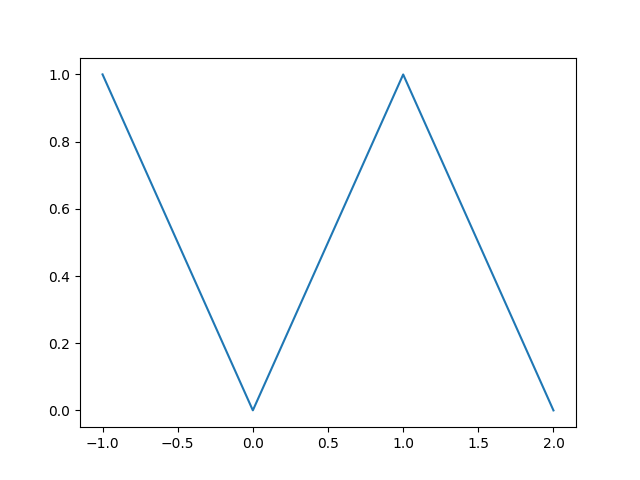

In [35]:
a = np.linspace(-1,2,5000)
b = (1+sawtooth(a*np.pi, 0.5))/2
fig, ax = plt.subplots()
ax.plot(a, b)
fig

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from packages import fmm, general

In [26]:
np.random.seed(0)

num_particles = 1000
precision = 4

particles = [general.Particle(1) for _ in range(num_particles)]

fmm_method = fmm.FMM(particles, precision)
fmm_method.do_fmm(True, True, True)
particles[0].potential

966.246490273677

In [24]:
np.sum(fmm_method.levels[-1].array[:,:,precision+1:])

(-179658.269090678-49134.28726912087j)

[0.5488135 +0.71518937j 0.54488318+0.4236548j  0.43758721+0.891773j
 0.38344152+0.79172504j 0.56804456+0.92559664j 0.0871293 +0.0202184j
 0.77815675+0.87001215j 0.79915856+0.46147936j 0.11827443+0.63992102j
 0.94466892+0.52184832j]


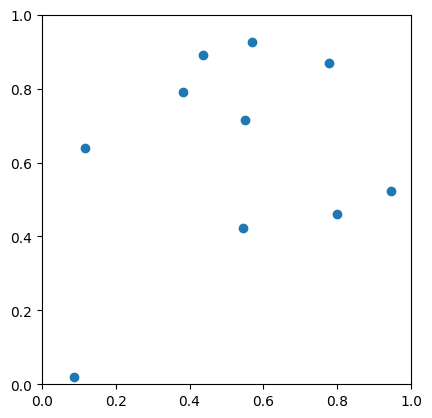

In [6]:
print(np.array([particle.centre for particle in particles]))

fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

points = [particle.centre for particle in particles]
X,Y = np.real(points), np.imag(points)

ax.scatter(X,Y)

# first_val = 1 / (2**(int(self.max_level/2)))
# # stop of 1 as this is the so called max value, but will never appear
# ticks = np.arange(first_val, 1, first_val)
# ax.set_xticks(ticks, minor=True)
# ax.set_yticks(ticks, minor=True)
# ax.grid(True, 'minor')

plt.show()

In [1]:
import numpy as np

from packages import bh, general

In [2]:
np.random.seed(0)

particles = [general.Particle() for _ in range(10)]

general.pairwise.potentials(particles, True)
dir_pot = np.array([p.direct_potential for p in particles])

bh_method = bh.BH(particles, 0.5, 4)
bh_method.do_bh(True)
bh_pot = np.array([p.potential for p in particles])

diff = bh_pot - dir_pot

In [3]:
print(dir_pot)
print(bh_pot)
print(diff)

[ 1.77618543  1.46548391 -0.38503705  1.79017718  3.72685008 -0.05757395
  0.22718745  1.02332332  1.57473244  2.20095041]
[ 1.77618543  1.46567173 -0.38511703  1.7899441   3.72678591 -0.05757756
  0.22734182  1.02334579  1.5748343   2.20097444]
[-2.22044605e-16  1.87819467e-04 -7.99793706e-05 -2.33078124e-04
 -6.41658577e-05 -3.60678729e-06  1.54365935e-04  2.24634352e-05
  1.01855832e-04  2.40328191e-05]


In [2]:
import numpy as np

In [3]:
def full(z0: complex):
    return z0/abs(z0)**2

def conj(z0: complex):
    return (1/z0).conjugate

In [4]:
np.random.seed(0)

In [5]:
%%timeit
z0 = np.random.random() + 1j*np.random.random()
full(z0)

845 ns ± 15.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
np.random.seed(0)

In [7]:
%%timeit
z0 = np.random.random() + 1j*np.random.random()
conj(z0)

832 ns ± 8.82 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
